# Task 2

## Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application.

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best.


In this task you will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and you will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. Parts of the data preparation will be omitted for you to do, but we will provide hints to lead you in the right direction.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How many of the loan applicants have dependents based on the historical dataset?

5. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

6. Are applicants with a credit history more likely to default than those who do not have one?

7. Is there a correlation between the applicant's income and the loan amount they applied for?

### Part Two

Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.













## Import Libraries




In [2]:
!pip install sweetviz
#uncomment the above if you need to install the library
# !pip install auto-sklearn
#uncomment the above if you need to install the library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 36.1 MB/s eta 0:00:00


In [ ]:
# !pip install --upgrade scipy

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz
# import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

## Import Datasets

In [5]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# Part One

## EDA

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# storing len of train and test data to seperate them in future after preporcessing

In [30]:
train_len = len(train)
print(train_len)

print('\n')

test_len = len(test)
print(test_len)

614


367


In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
test.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [10]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.shape

(981, 13)

### Sweetviz

                                             |          | [  0%]   00:00 -> (? left)


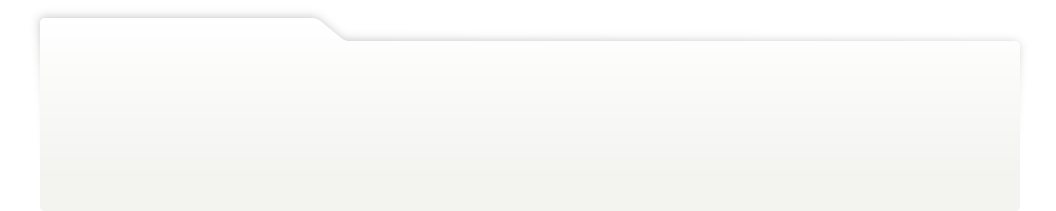
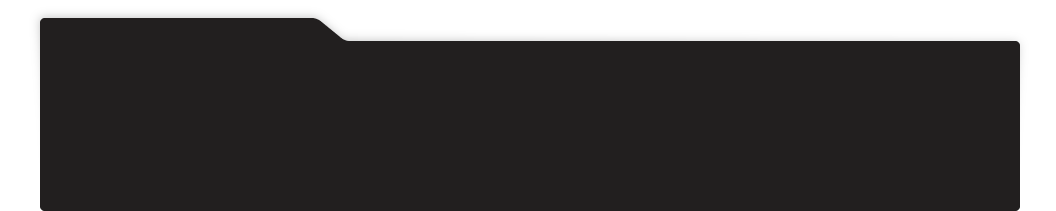
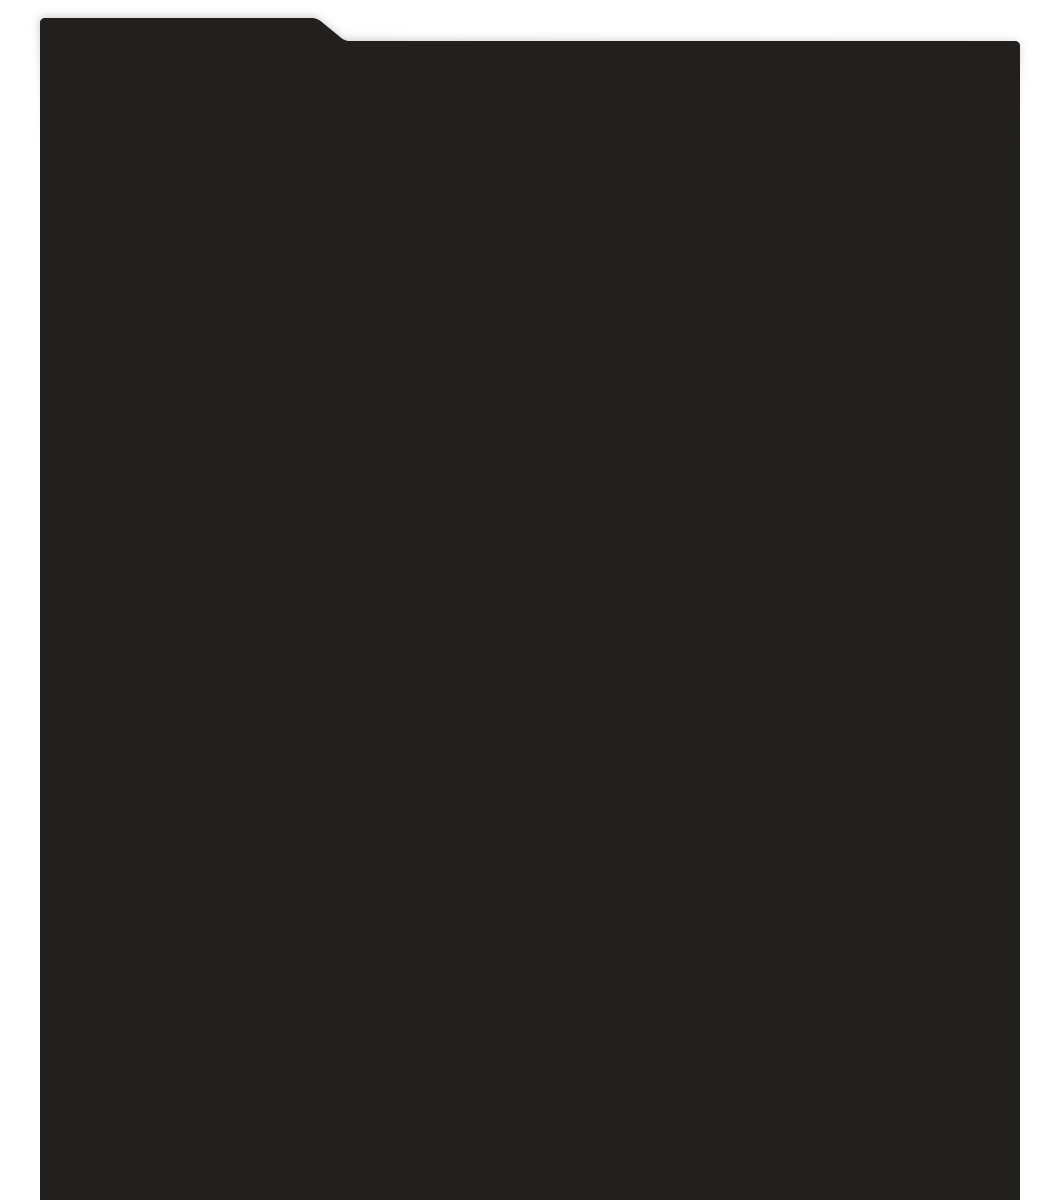
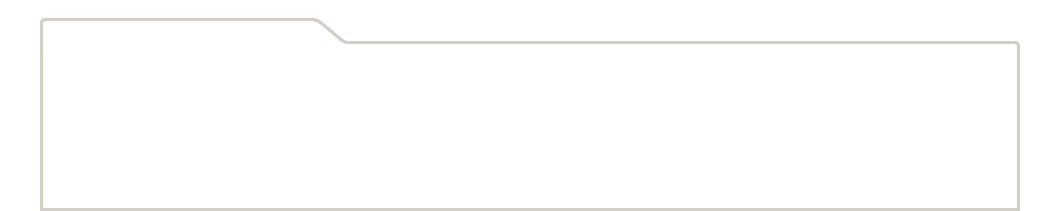
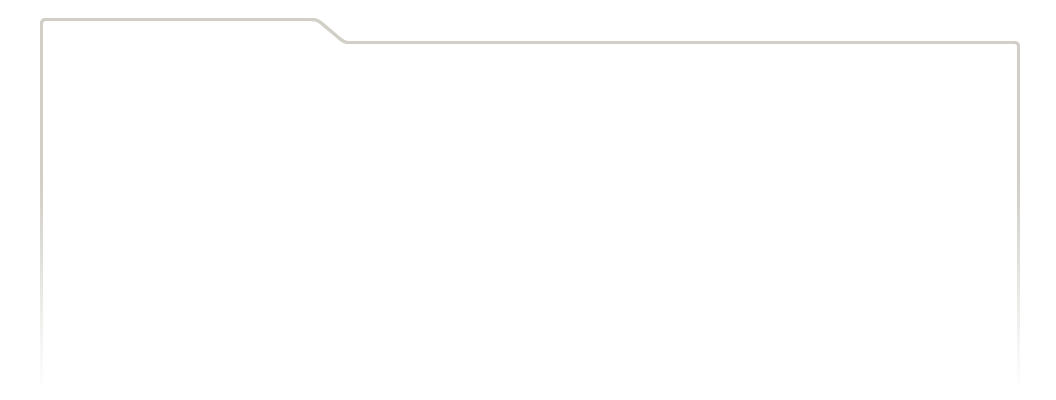
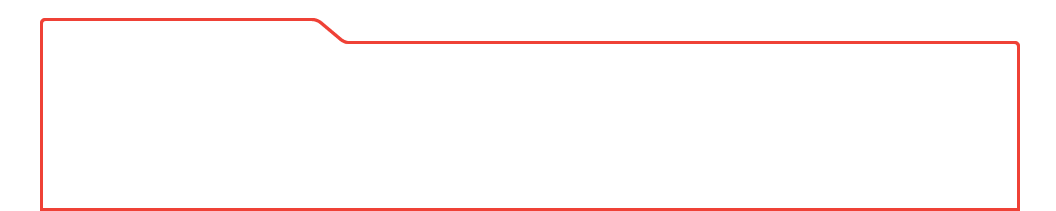
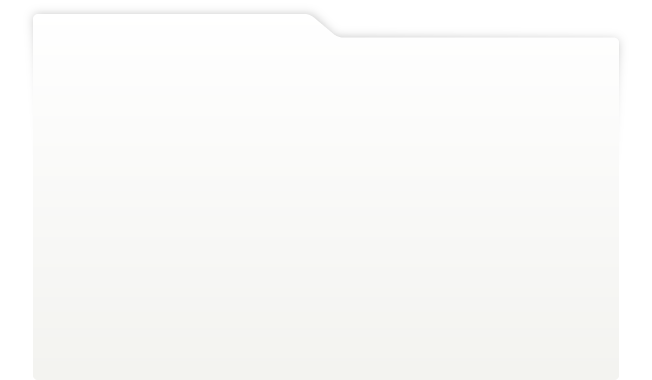
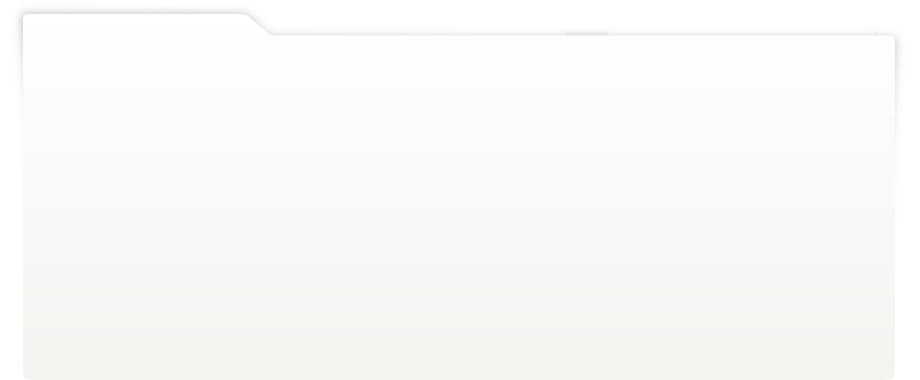
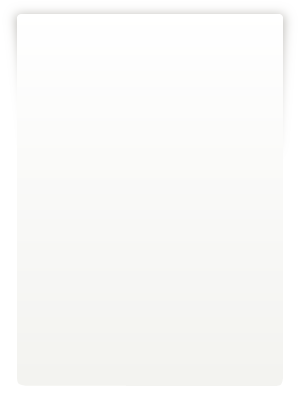
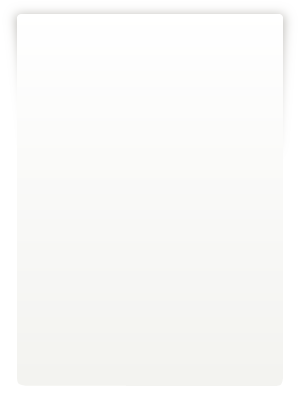
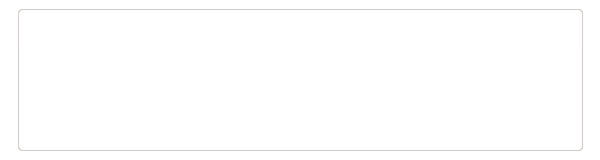
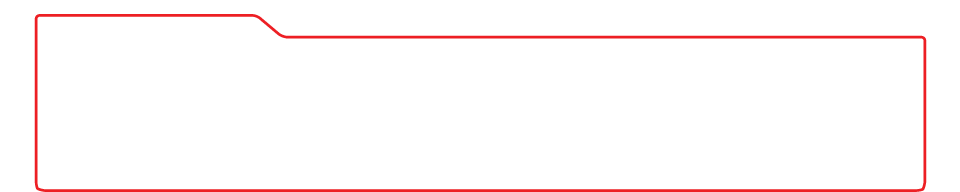
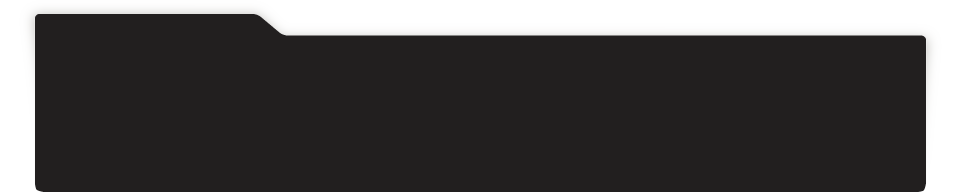
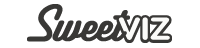
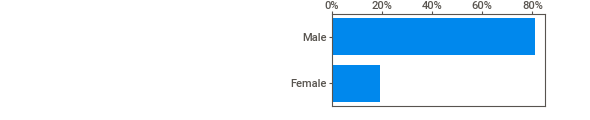
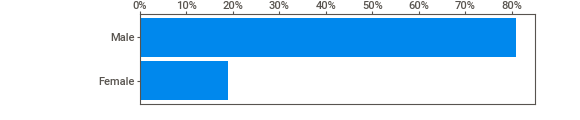
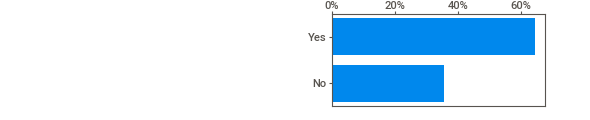
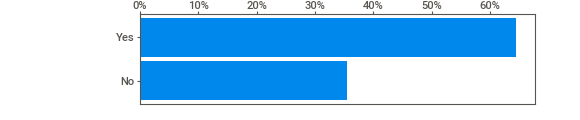
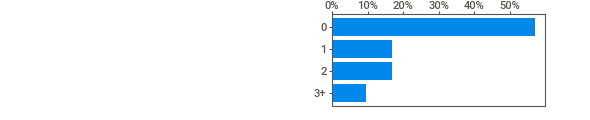
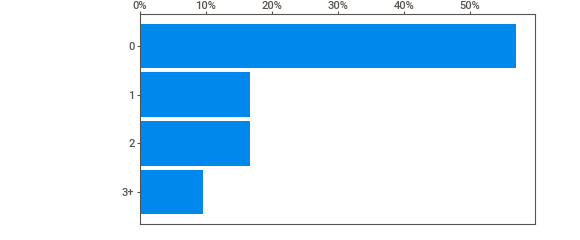
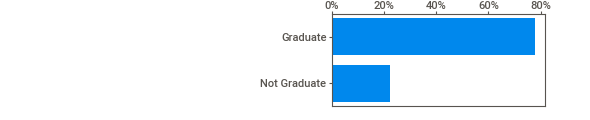
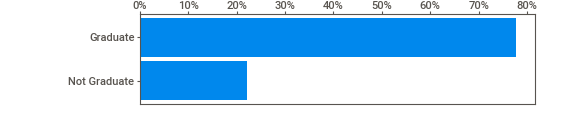
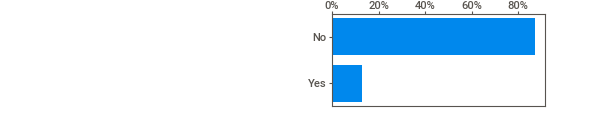
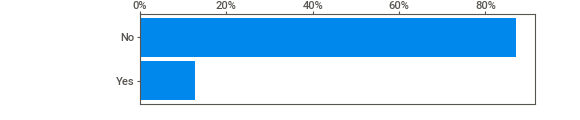
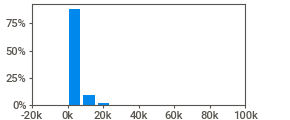
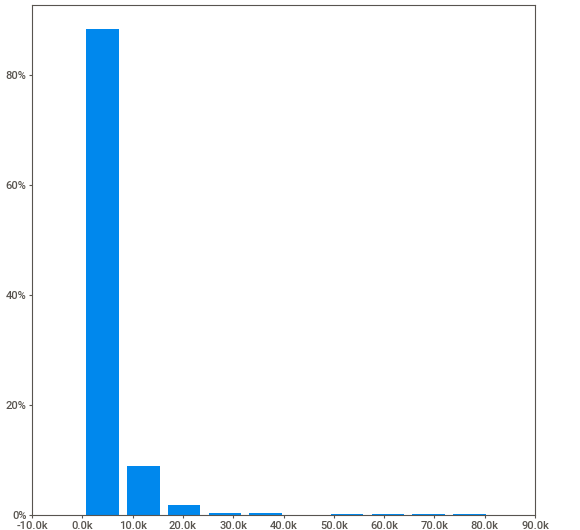
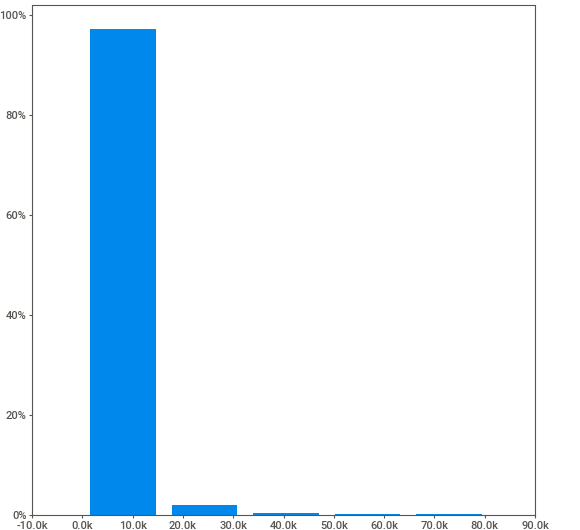
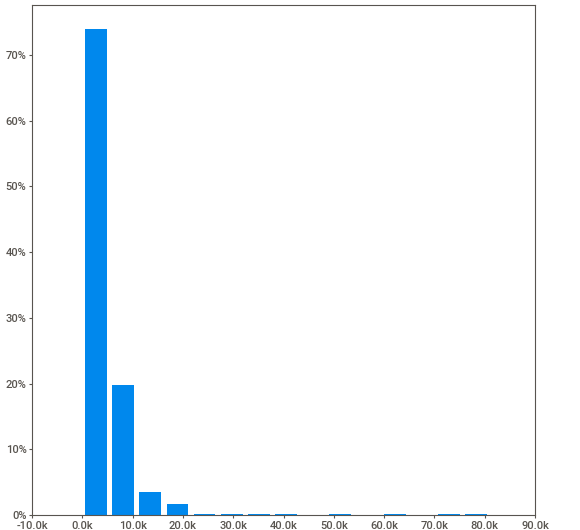
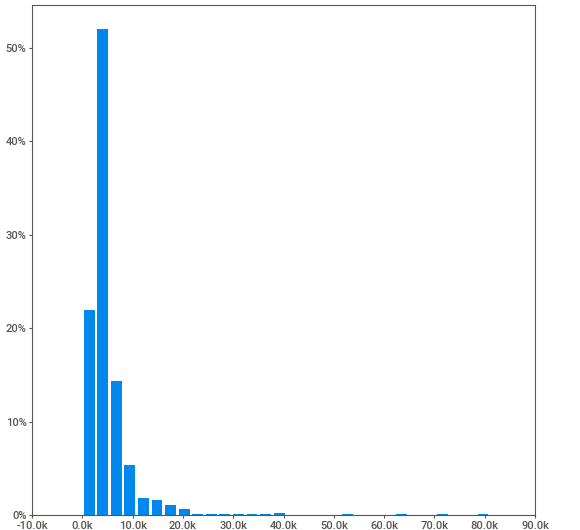
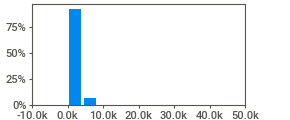
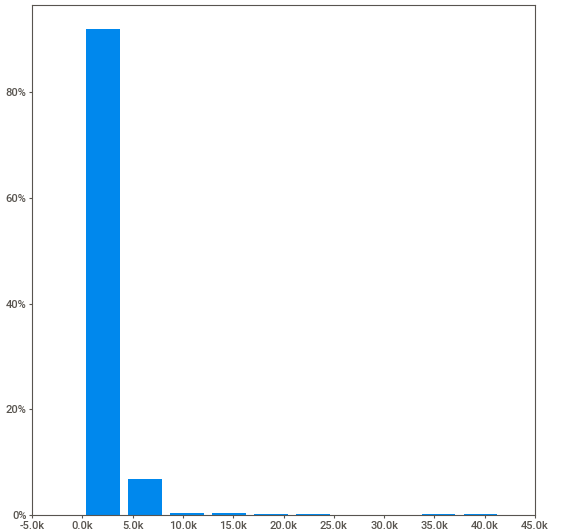
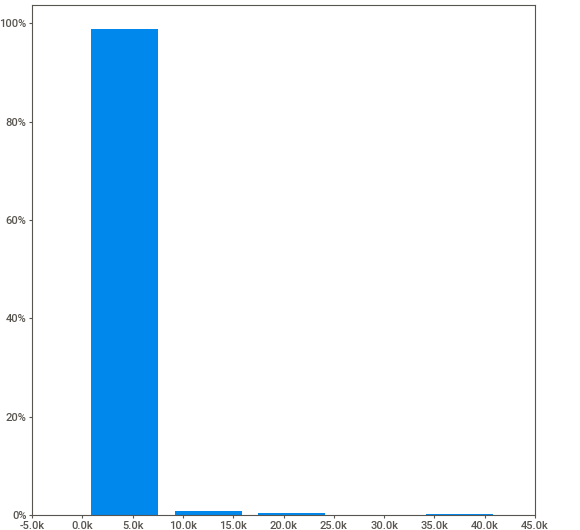
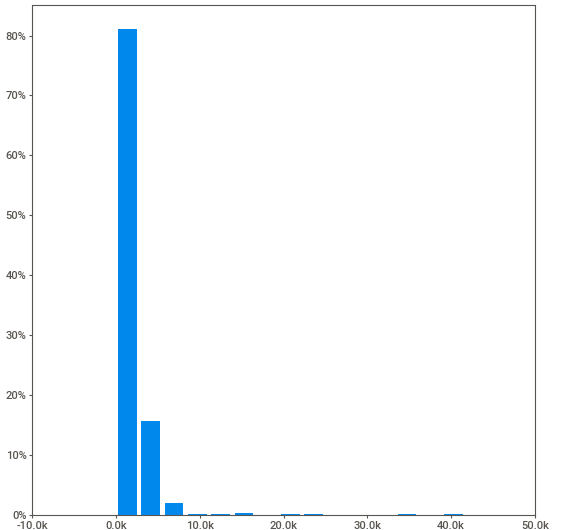
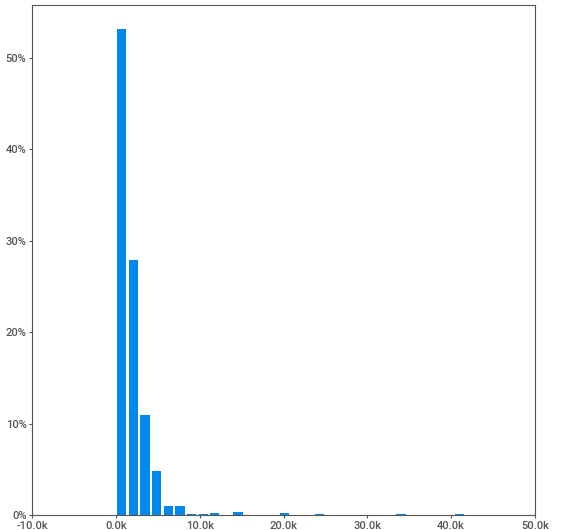
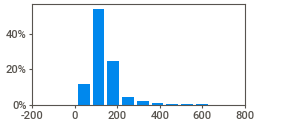
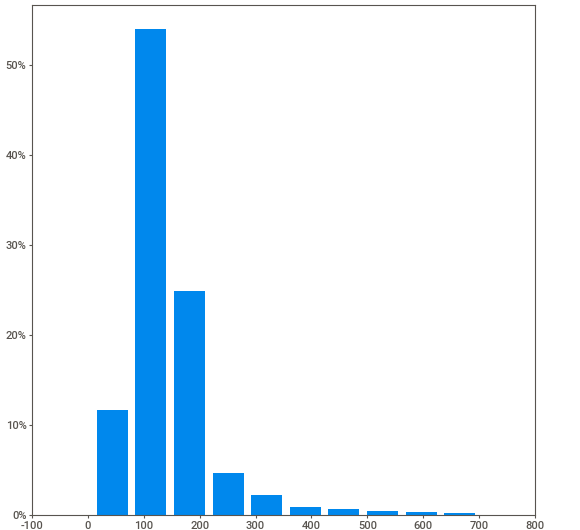
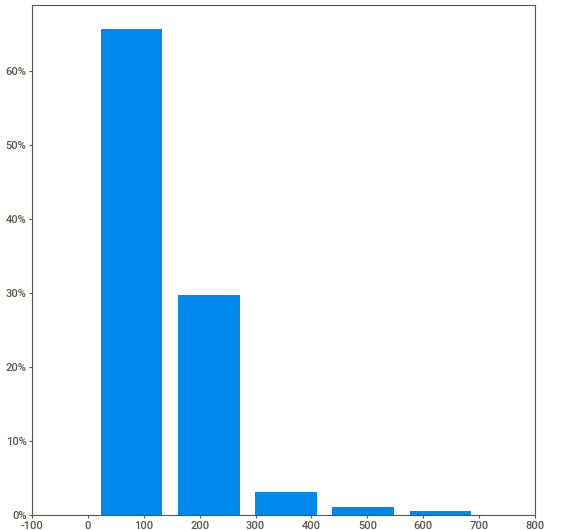
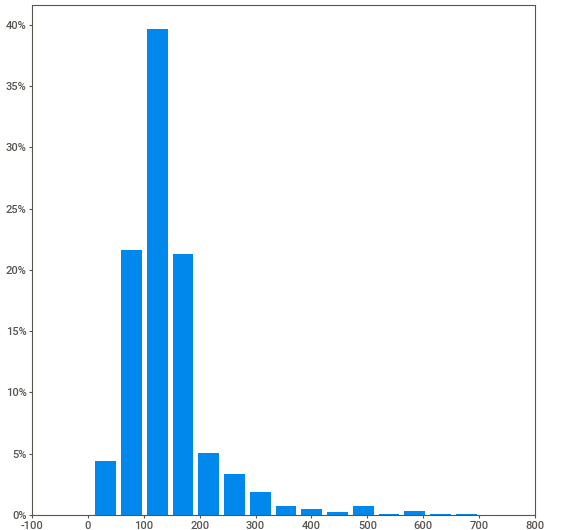
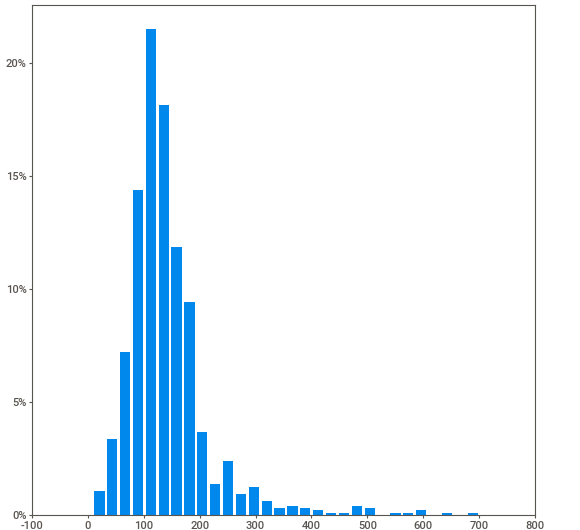
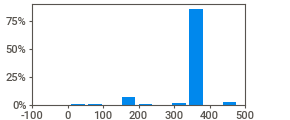
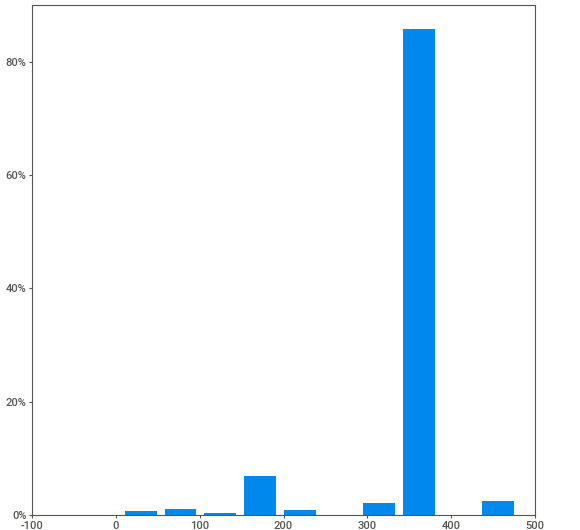
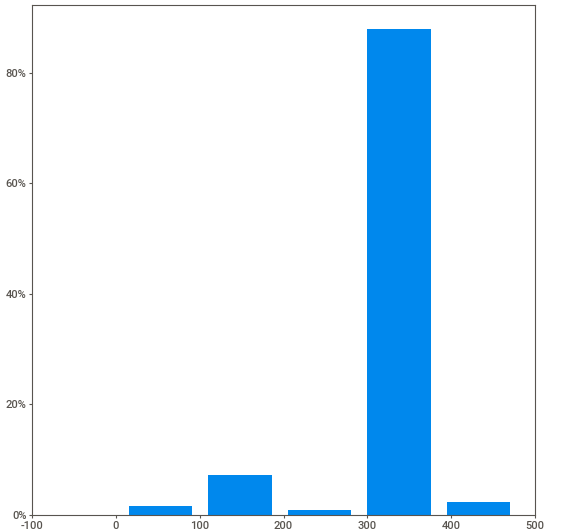
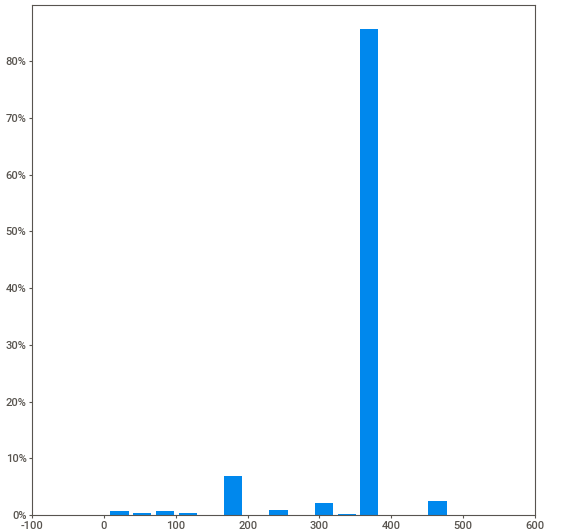
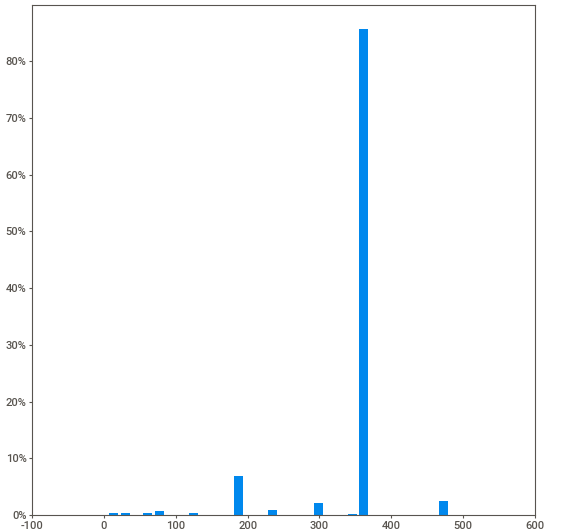
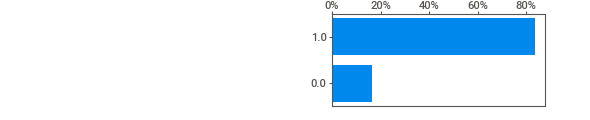
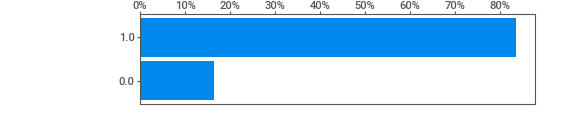
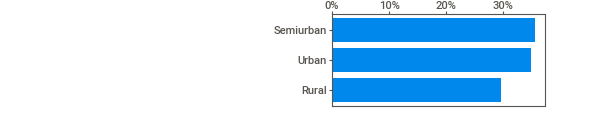
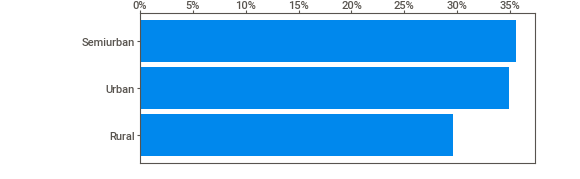
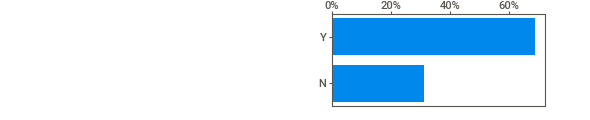
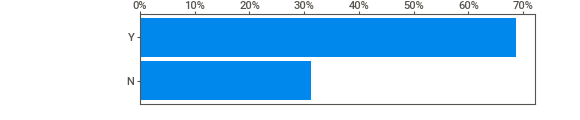
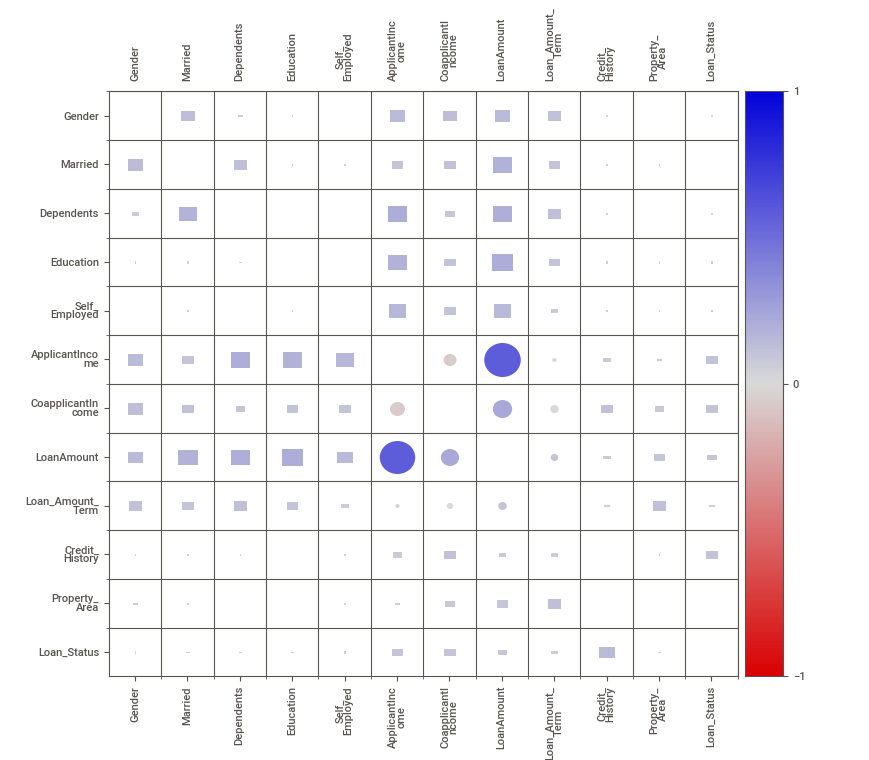
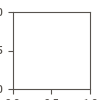

In [13]:
autoEDA = sweetviz.analyze(df)
autoEDA.show_notebook()

### Your Own EDA


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [15]:
# from initial understanding, there were found some null values

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [20]:
for i in df.columns:
  if df[i].dtypes == 'object':
    print(i)
    print(df[i].value_counts())
    print('\n')

Loan_ID
Loan_ID
LP002989    1
LP001002    1
LP001003    1
LP001005    1
LP001006    1
           ..
LP001052    1
LP001066    1
LP001068    1
LP001073    1
LP001086    1
Name: count, Length: 981, dtype: int64


Gender
Gender
Male      775
Female    182
Name: count, dtype: int64


Married
Married
Yes    631
No     347
Name: count, dtype: int64


Dependents
Dependents
0     545
1     160
2     160
3+     91
Name: count, dtype: int64


Education
Education
Graduate        763
Not Graduate    218
Name: count, dtype: int64


Self_Employed
Self_Employed
No     807
Yes    119
Name: count, dtype: int64


Property_Area
Property_Area
Semiurban    349
Urban        342
Rural        290
Name: count, dtype: int64


Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64




In [21]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [ ]:
# creating a copy of data to avoid modifying original dataframe

In [22]:
data = df.copy()

In [32]:
# Filling the Categorical missing data with the most occuring data
data.Gender.fillna('Male', inplace= True)
data.Dependents.fillna(0, inplace= True)
data.Self_Employed.fillna('No', inplace= True)
data.Loan_Status.fillna('Y', inplace= True)
data.Married.fillna('Yes', inplace= True)



In [24]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [26]:
# Filling the Numerical missing data with the 0

for i in data.columns:
  if data[i].dtypes != 'object':
    data[i].fillna(0, inplace = True)

In [33]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Treated all the null values, now we try to convert all the float to int, since our task is to find the customer's will do loan default or not

In [34]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
for i in data.columns:
  if data[i].dtypes == 'float64':
    data[i] = data[i].astype('int64')


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            981 non-null    object
 1   Gender             981 non-null    object
 2   Married            981 non-null    object
 3   Dependents         981 non-null    object
 4   Education          981 non-null    object
 5   Self_Employed      981 non-null    object
 6   ApplicantIncome    981 non-null    int64 
 7   CoapplicantIncome  981 non-null    int64 
 8   LoanAmount         981 non-null    int64 
 9   Loan_Amount_Term   981 non-null    int64 
 10  Credit_History     981 non-null    int64 
 11  Property_Area      981 non-null    object
 12  Loan_Status        981 non-null    object
dtypes: int64(5), object(8)
memory usage: 107.3+ KB


In [40]:
# Treated datatypes now Remove some unwanted columns

data = data.drop(['Loan_ID'], axis =1)
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [41]:
data.Dependents.str.replace('3+','3')

0      0
1      1
2      0
3      0
4      0
      ..
362    3
363    0
364    0
365    0
366    0
Name: Dependents, Length: 981, dtype: object

In [42]:
data.Dependents = data.Dependents.str.replace('3+','3')

In [43]:
data.Dependents.value_counts()

Dependents
0    545
1    160
2    160
3     91
Name: count, dtype: int64

In [44]:
data.shape

(981, 12)

# Now try to convert all the Categorical values into Numerical through Label encoding for faster processing

In [50]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()

# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [53]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate over each categorical column and encode its values
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [54]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,0,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             981 non-null    int64
 1   Married            981 non-null    int64
 2   Dependents         981 non-null    int64
 3   Education          981 non-null    int64
 4   Self_Employed      981 non-null    int64
 5   ApplicantIncome    981 non-null    int64
 6   CoapplicantIncome  981 non-null    int64
 7   LoanAmount         981 non-null    int64
 8   Loan_Amount_Term   981 non-null    int64
 9   Credit_History     981 non-null    int64
 10  Property_Area      981 non-null    int64
 11  Loan_Status        981 non-null    int64
dtypes: int64(12)
memory usage: 99.6 KB


# EDA

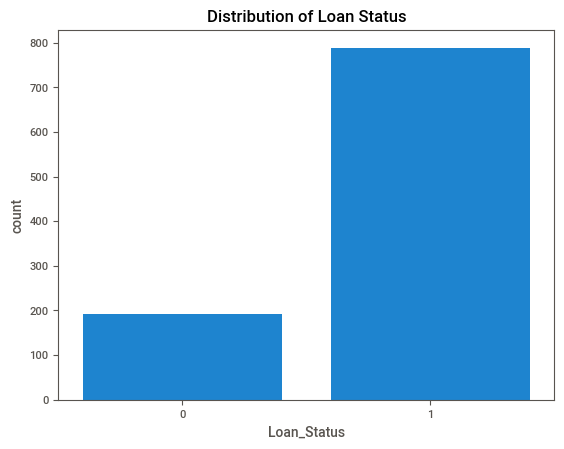

In [68]:
# distribution of Target variable

sns.countplot(x='Loan_Status', data=data)
plt.title('Distribution of Loan Status')
plt.show()

In [69]:
# From this data we can see there is imbalance between the group as expected because most of them paying their loan correctly without defaulting

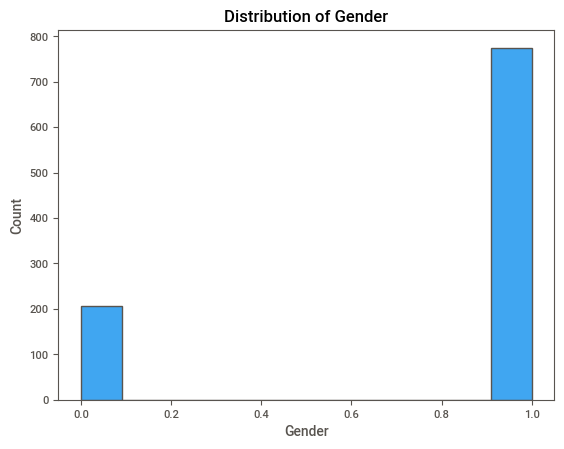

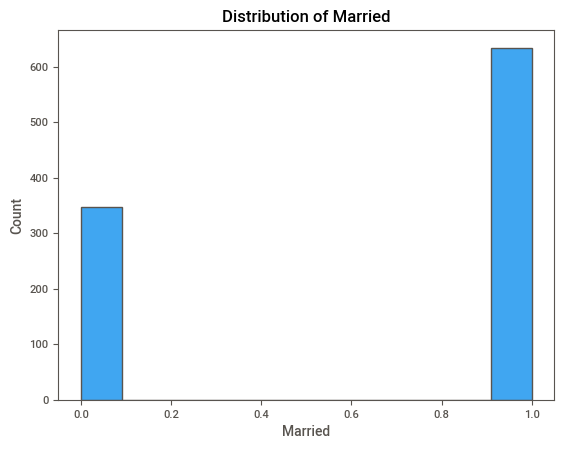

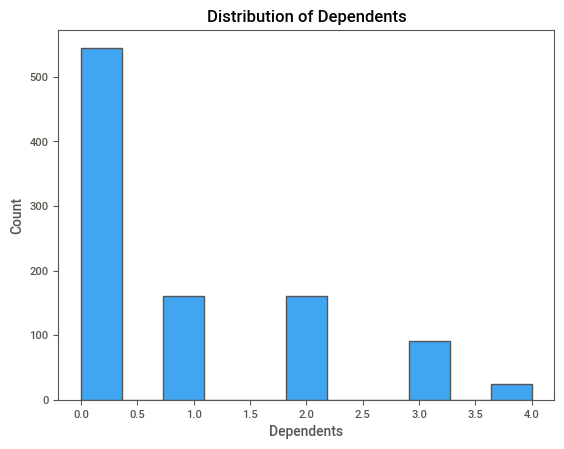

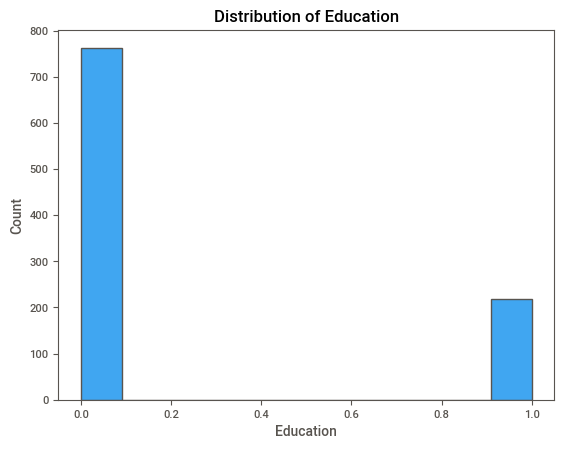

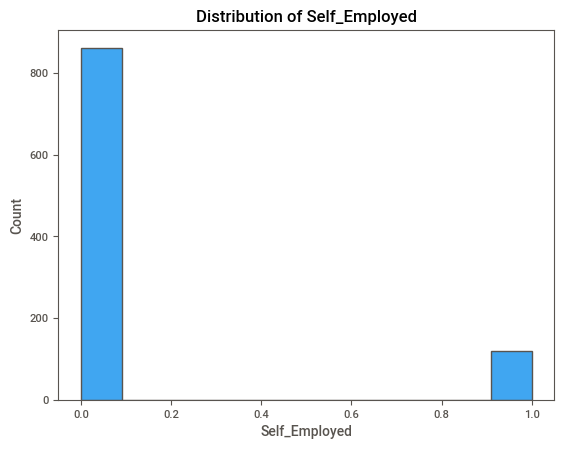

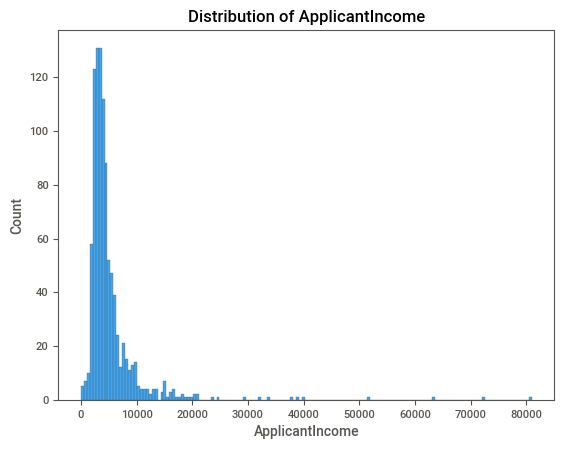

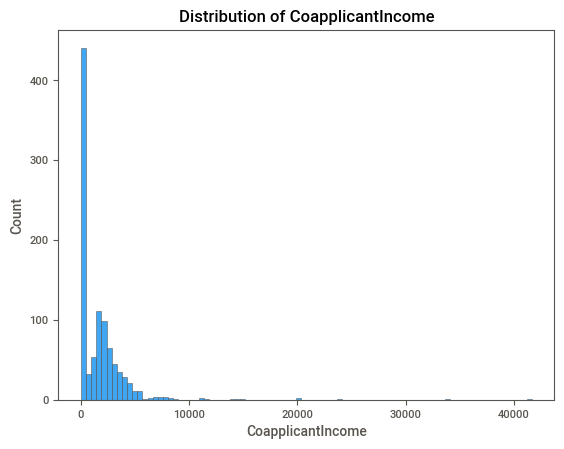

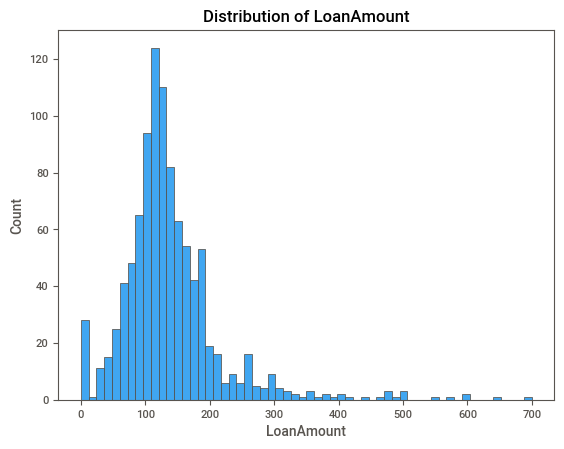

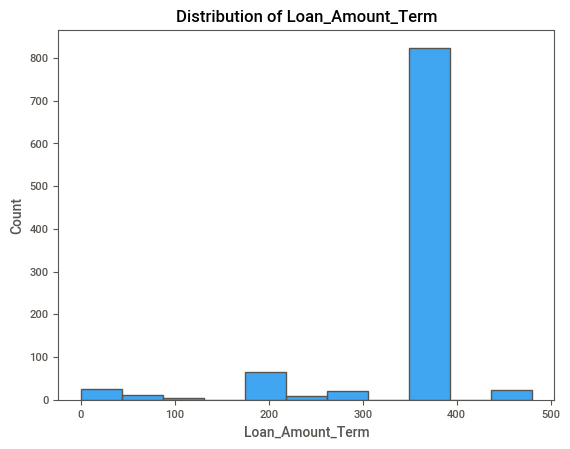

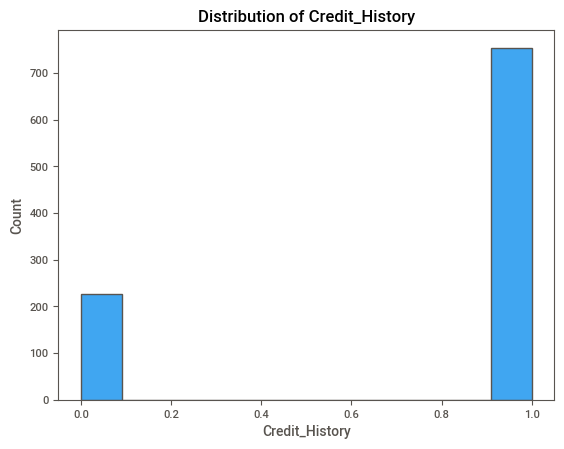

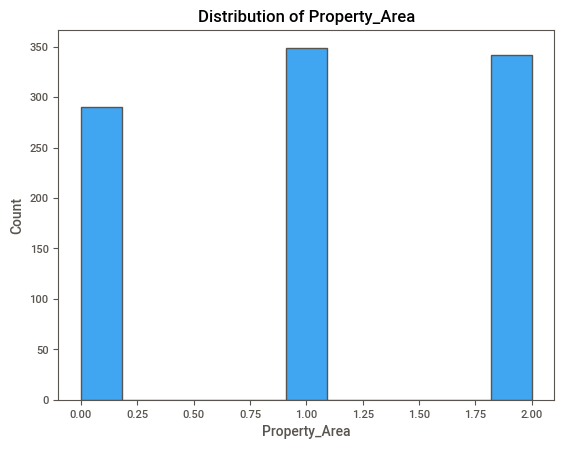

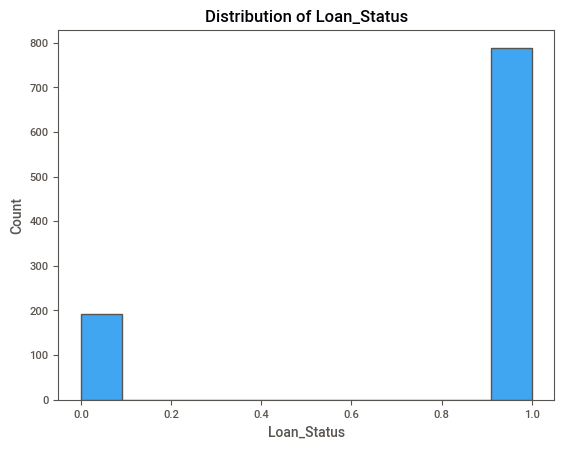

In [71]:
for feature in data:
    sns.histplot(data[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

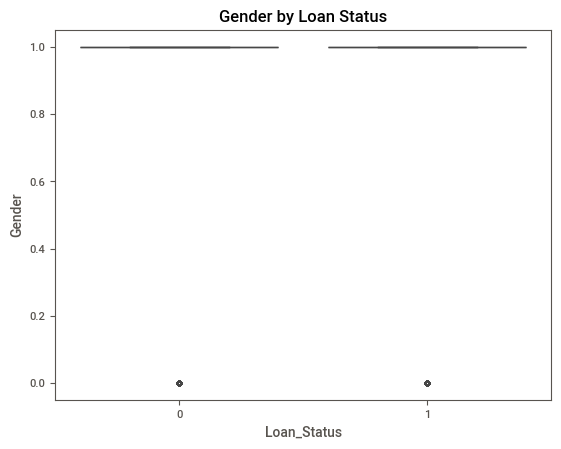

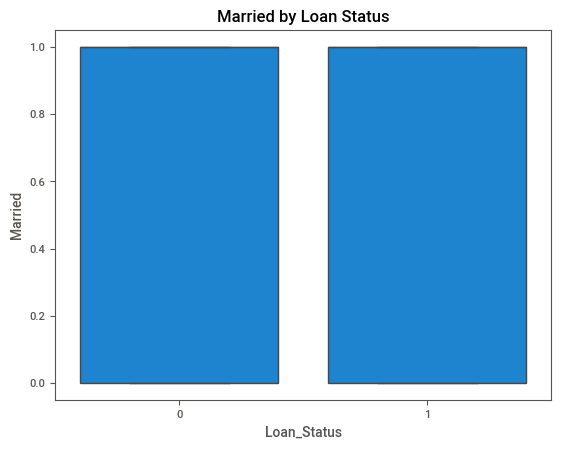

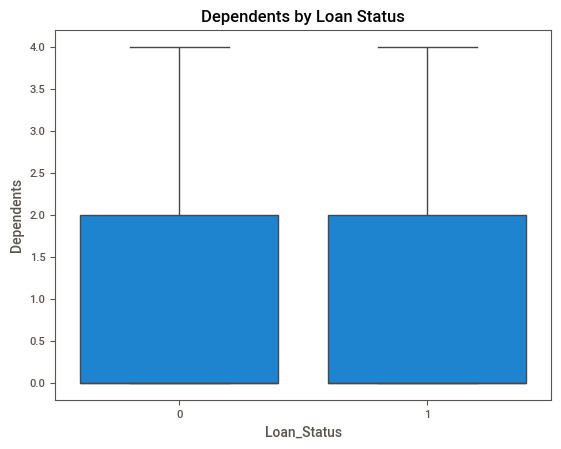

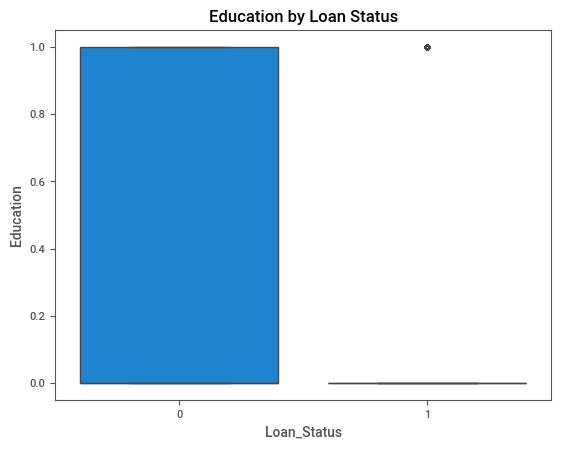

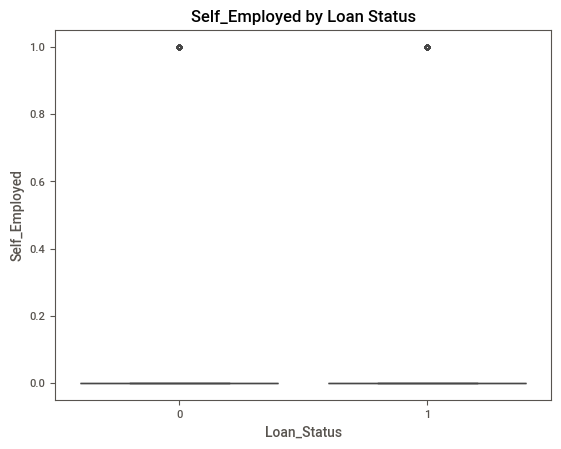

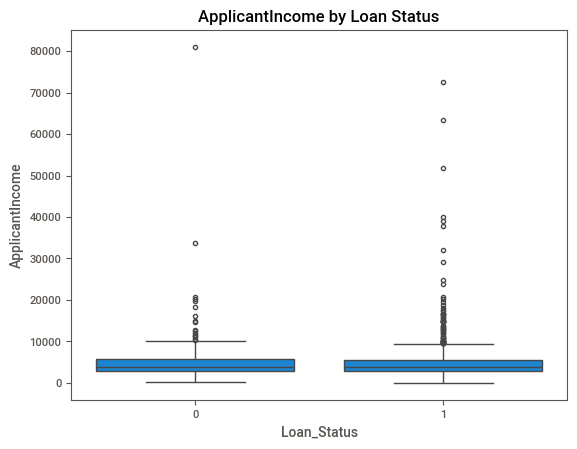

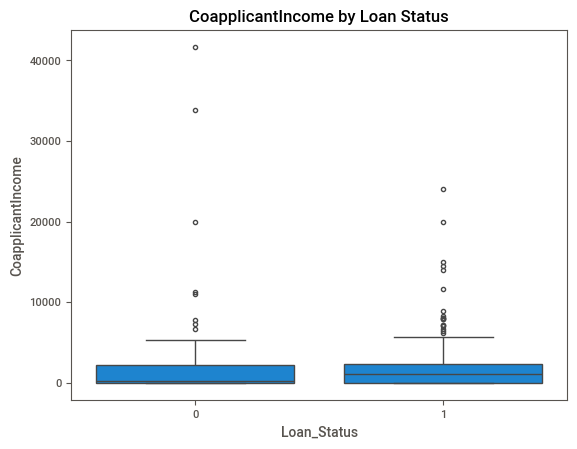

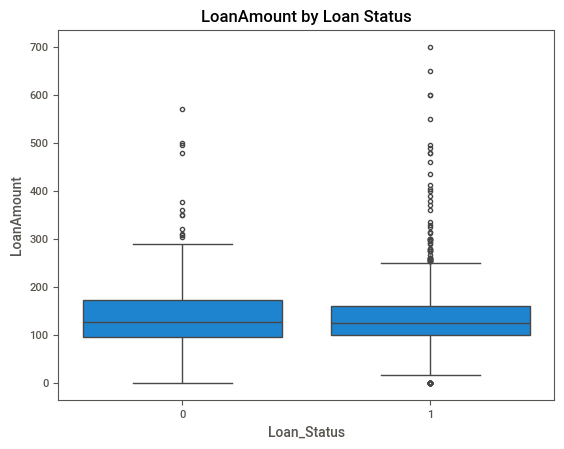

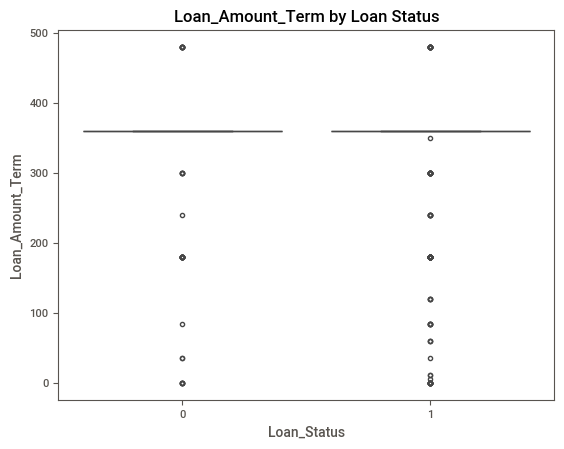

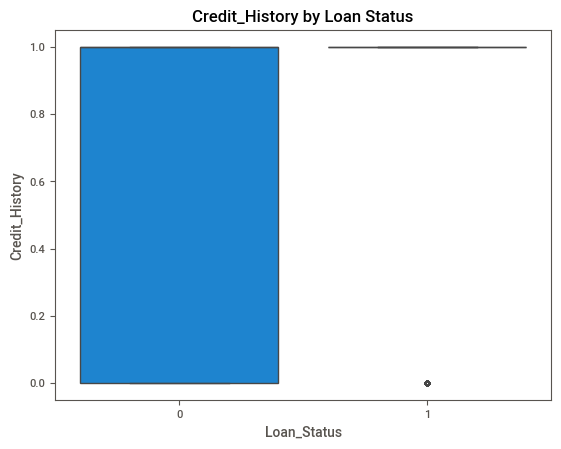

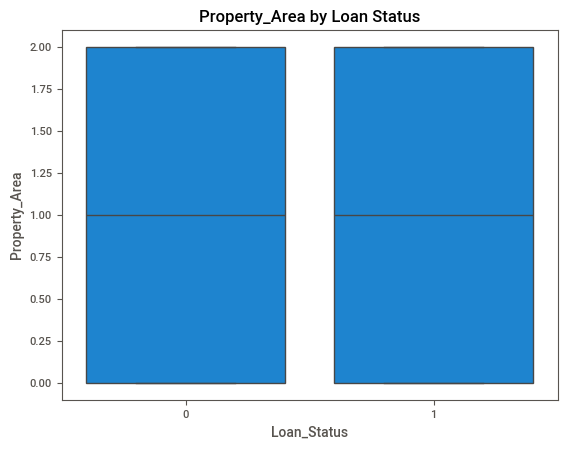

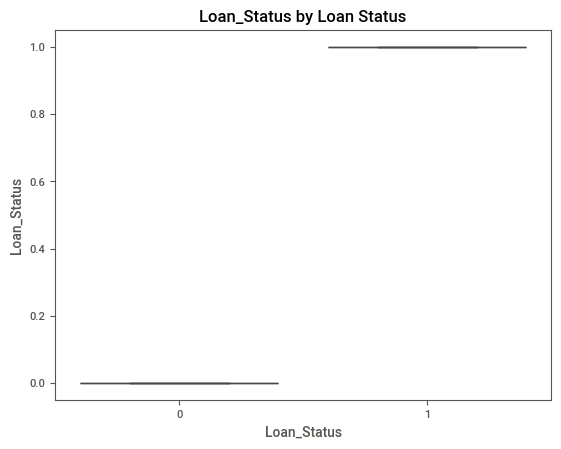

In [72]:
for feature in data:
    sns.boxplot(x='Loan_Status', y=feature, data=data)
    plt.title(f'{feature} by Loan Status')
    plt.show()

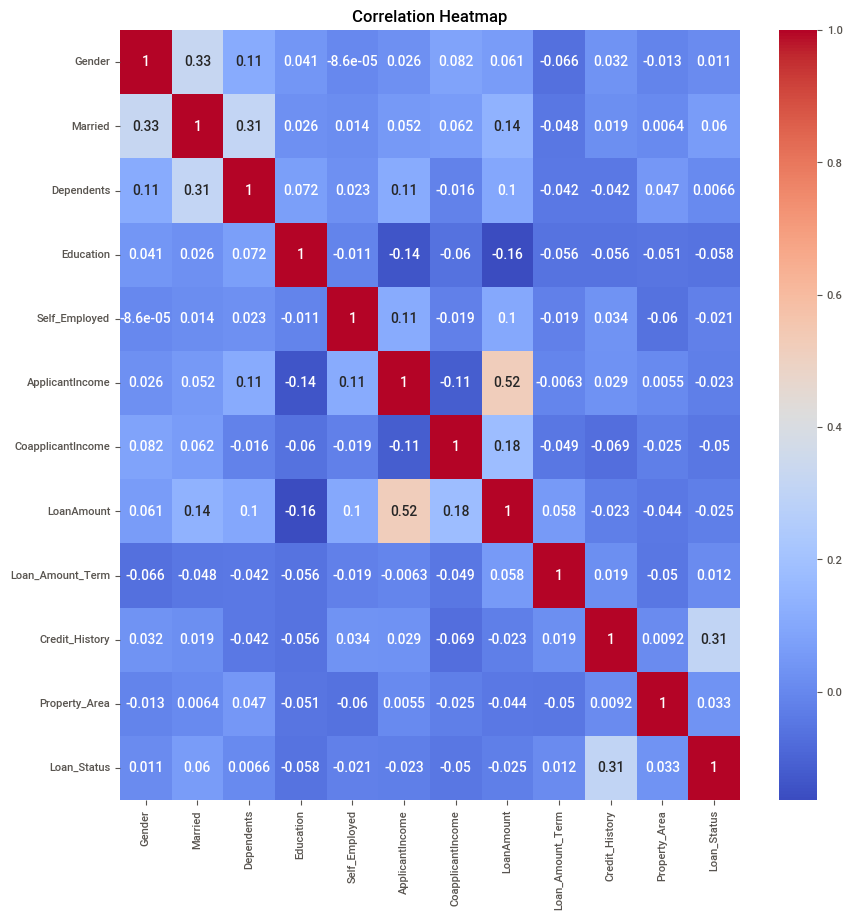

In [75]:
# Correlation
plt.figure(figsize= (10,10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

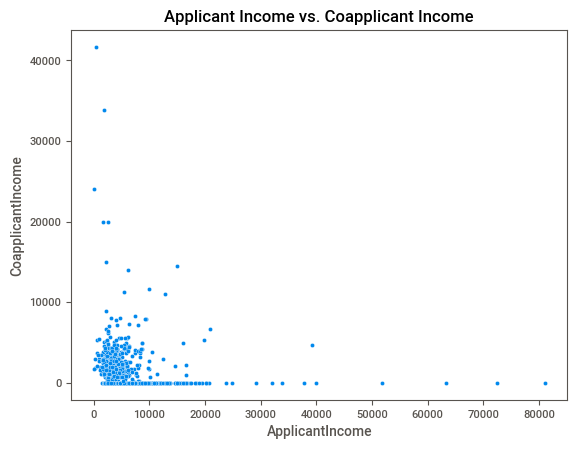

In [76]:
# applicant vs co-applicant income

sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome', data=data)
plt.title('Applicant Income vs. Coapplicant Income')
plt.show()

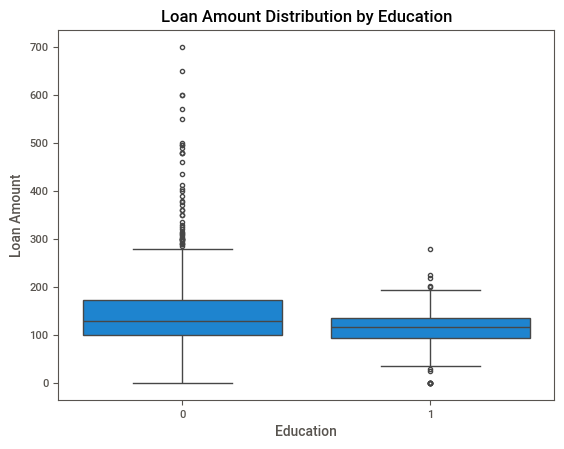

In [78]:
# Loan Amount Distribution by Education Level:

sns.boxplot(x='Education', y='LoanAmount', data=data)
plt.title('Loan Amount Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show()

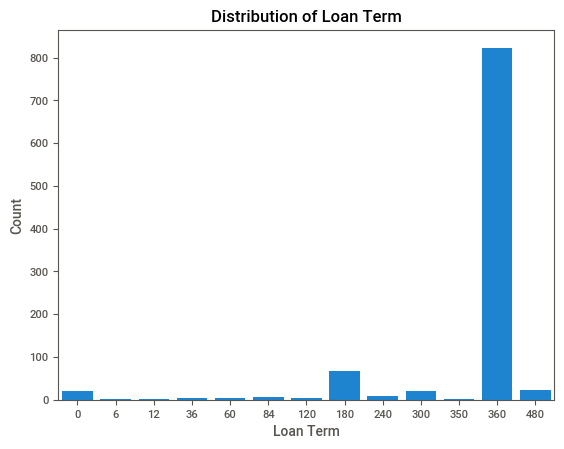

In [80]:
# loan term dist
sns.countplot(x='Loan_Amount_Term', data=data)
plt.title('Distribution of Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()


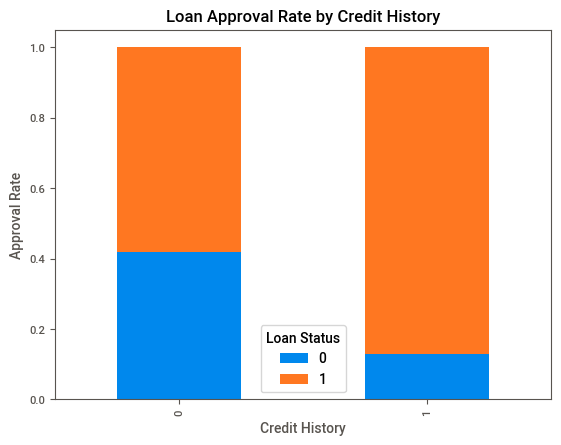

In [81]:
# loan amount by credit history

approval_rates_credit = data.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack()
approval_rates_credit.plot(kind='bar', stacked=True)

plt.title('Loan Approval Rate by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Approval Rate')
plt.legend(title='Loan Status')
plt.show()


# Part Two Model building

In [ ]:
# Autosklean is not working for me hence i will implement tradintional ml for getting optimal model

# preprocessing and EDA got completed now we try to seperate the train and test data again

In [ ]:
train = data[:train_len]

test = data[615:]

In [ ]:
test.shape

(366, 12)

In [ ]:
# Dropping the Loan_Status columns as we use this dataset for predicting using ML models

test.drop('Loan_Status', axis =1, inplace = True)

<ipython-input-64-6889b2954d9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Loan_Status', axis =1, inplace = True)


In [ ]:
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 1 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             366 non-null    int64
 1   Married            366 non-null    int64
 2   Dependents         366 non-null    int64
 3   Education          366 non-null    int64
 4   Self_Employed      366 non-null    int64
 5   ApplicantIncome    366 non-null    int64
 6   CoapplicantIncome  366 non-null    int64
 7   LoanAmount         366 non-null    int64
 8   Loan_Amount_Term   366 non-null    int64
 9   Credit_History     366 non-null    int64
 10  Property_Area      366 non-null    int64
dtypes: int64(11)
memory usage: 34.3 KB


In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [84]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [85]:
# Split data into features and target variable
X = train.drop(columns=['Loan_Status'])
y = train['Loan_Status']

In [86]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
classifiers = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'classifier__penalty': ['l1', 'l2', 'elasticnet'],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__solver': ['liblinear', 'saga']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 5, 10, 20],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.5],
            'classifier__max_depth': [3, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf', 'poly']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7, 9],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__p': [1, 2]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.5],
            'classifier__max_depth': [3, 5, 10]
        }
    }
}


In [90]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Iterate over classifiers and perform hyperparameter tuning
for clf_name, clf in classifiers.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf['model'])
    ])
    grid_search = GridSearchCV(pipe, clf['params'], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Print best parameters and accuracy
    print(f"Best parameters for {clf_name}:")
    print(grid_search.best_params_)
    print(f"Best accuracy: {grid_search.best_score_}")

    # Predictions on test set
    y_pred = grid_search.predict(X_test)

    # Evaluate model performance
    print(f"Classification report for {clf_name}:")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


Best parameters for Logistic Regression:
{'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best accuracy: 0.7529239766081872
Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.51      0.61        43
           1       0.78      0.91      0.84        80

    accuracy                           0.77       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.77      0.77      0.76       123

Best parameters for Random Forest:
{'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best accuracy: 0.7997076023391814
Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59        43
           1       0.77      0.81      0.79        80

    accuracy                           0.72       123
   macro avg       0.69      0.69  

# Now try to find the best accuracy modell based on f1 score

In [93]:
# Import f1_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

# Initialize variables to track best model and its parameters
best_model_name = None
best_model = None
best_f1_score = 0

# Iterate over classifiers and perform hyperparameter tuning
for clf_name, clf in classifiers.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf['model'])
    ])

    grid_search = GridSearchCV(pipe, clf['params'], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Predictions on test set
    y_pred = grid_search.predict(X_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    # Print F1 score for current model
    print(f"F1 score for {clf_name}: {f1}")

    # Check if current model has better F1 score than the previous best model
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model_name = clf_name
        best_model = grid_search.best_estimator_

# Print the best model and its parameters
print(f"Best model based on F1 score: {best_model_name}")
print(f"Best F1 score: {best_f1_score}")
print(f"Best parameters: {best_model.named_steps['classifier'].get_params()}")


F1 score for Logistic Regression: 0.8390804597701149
F1 score for Random Forest: 0.7852760736196319
F1 score for Gradient Boosting: 0.7852760736196319
F1 score for SVM: 0.8390804597701149
F1 score for KNN: 0.7836257309941521
F1 score for XGBoost: 0.813953488372093
Best model based on F1 score: Logistic Regression
Best F1 score: 0.8390804597701149
Best parameters: {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
